In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import torch

In [11]:
x = np.loadtxt("d:/datasets/uci/madelon/madelon_train.data")
y = np.loadtxt("d:/datasets/uci/madelon/madelon_train.labels", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/madelon/madelon_valid.data")
yt = np.loadtxt("d:/datasets/uci/madelon/madelon_valid.labels", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(2000, 500) (2000,) (600, 500) (600,)


In [63]:
x = np.loadtxt("d:/datasets/uci/dexter/dexter_train.csv", delimiter=',')
y = np.loadtxt("d:/datasets/uci/dexter/dexter_train.labels", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/dexter/dexter_valid.csv", delimiter=',')
yt = np.loadtxt("d:/datasets/uci/dexter/dexter_valid.labels", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(300, 20000) (300,) (300, 20000) (300,)


In [50]:
x = np.loadtxt("d:/datasets/uci/hill-valley/x.dat")
y = np.loadtxt("d:/datasets/uci/hill-valley/y.dat", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/hill-valley/xtest.dat")
yt = np.loadtxt("d:/datasets/uci/hill-valley/ytest.dat", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(606, 100) (606,) (606, 100) (606,)


In [2]:
x = np.loadtxt("d:/datasets/uci/gisette/gisette_train.data")
y = np.loadtxt("d:/datasets/uci/gisette/gisette_train.labels", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/gisette/gisette_valid.data")
yt = np.loadtxt("d:/datasets/uci/gisette/gisette_valid.labels", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(6000, 5000) (6000,) (1000, 5000) (1000,)


In [3]:
sx=np.std(x,axis=0)
x=x[:,sx>0]
xt=xt[:,sx>0]
mx=np.mean(x,axis=0)
sx=np.std(x,axis=0)
print(x.shape)
x=(x-mx)/sx
xt=(xt-mx)/sx
print(np.std(x,axis=0))

(6000, 4955)
[1. 1. 1. ... 1. 1. 1.]


In [4]:
n=x.shape[0]
nt=xt.shape[0]
x=np.concatenate((np.ones((n,1)),x),axis=1)
xt=np.concatenate((np.ones((nt,1)),xt),axis=1)
print(x.shape,xt.shape)

(6000, 4956) (1000, 4956)


In [5]:
y1=y.copy()
yt1=yt.copy()

In [6]:
y[y<0]=0
yt[yt<0]=0

In [8]:
y

array([1., 0., 1., ..., 0., 0., 0.])

(6000,) (6000,) 0.6931471805599454 (4956,)
99 0.20326586107500605 0.07383333333333333 0.082 105


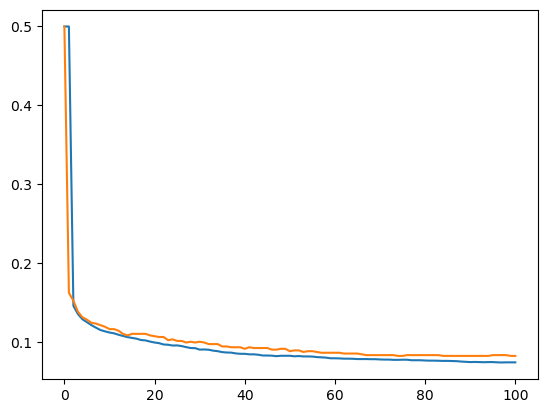

In [27]:
def loss(xw,y):
    yxw=y.reshape(-1)*xw.reshape(-1)
    leyxw=np.log(1+np.exp(-yxw))
    return np.mean(leyxw)

def grad(xw,y):
    py=1/(1+np.exp(-xw))
    g=x.T@(y.reshape(-1)-py.reshape(-1))
    return g
def teta(w,la):
    w[np.abs(w)<=la]=0
    return w
def err(xw,y):
    py=(xw>0)
    return np.mean(py!=y)

eta=.1
la=0.013
las=[0.013,0.006]
p=x.shape[1]
w=np.zeros((p))
xw=x@w
l=loss(xw,y)
g=grad(xw,y)
print(xw.shape,y.shape,l,g.shape)
los=[l]
errs=[err(xw,y)]
xtw=xt@w
errst=[err(xtw,yt)]

for it in range(100):
    xw=x@w
    g=grad(xw,y)
    w=teta(w+eta*g/n,la)
    l=loss(xw,y1)
    e=err(xw,y)
    los.append(l)
    xtw=xt@w
    et=err(xtw,yt)
    errs.append(e)
    errst.append(et)
print(it,l,e,et,np.sum(w!=0))
plt.plot(errs)
plt.plot(errst)

In [82]:
xwt=xt@w
print(err(xw,y),err(xwt,yt))

0.0295 0.03


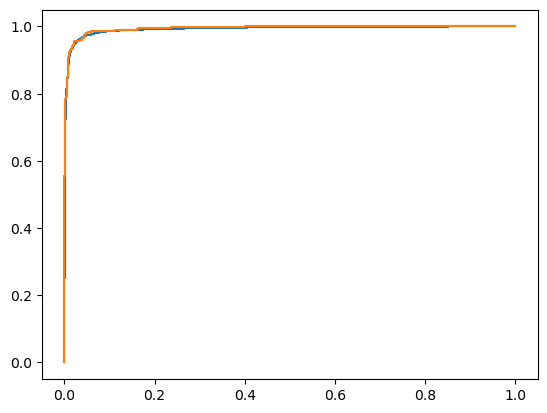

In [78]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, xw)
fprt, tprt, thresholds = metrics.roc_curve(yt, xwt)
plt.plot(fpr,tpr)
plt.plot(fprt,tprt)

(6000,) (6000,) 0.6931471805599454 (4956,)


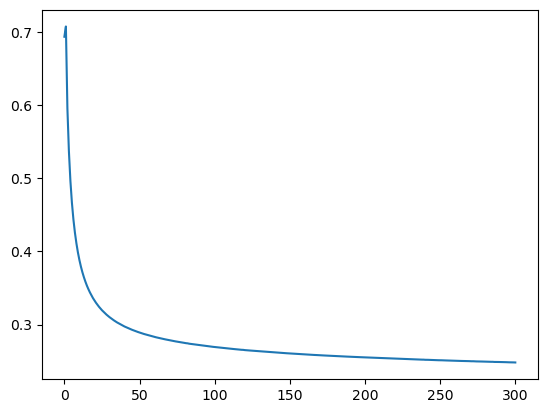

In [81]:
eta=0.01
la=0.01
p=x.shape[1]
w=np.zeros((p))
xw=x@w
l=-loglik(xw,y)/n+la*np.sum(np.abs(w))
g=grad(xw,y)
print(xw.shape,y.shape,l,g.shape)
los=[l]
for it in range(300):
    xw=x@w
    g=grad(xw,y)
    w=w-eta*la*np.sign(w)+eta*g/n
    l=-loglik(xw,y)/n+la*np.sum(np.abs(w))
    #print(it,l)
    los.append(l)
plt.plot(los)

In [83]:
print(np.sum(w!=0),np.sum(np.abs(w)>la))

4956 391
